# 02. Neural Network Classification with TensorFlow

## Typical architecture of a classification neural network

In [3]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2024-12-23 19:26:28.863701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-23 19:26:28.863722: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0
Notebook last run (end-to-end): 2024-12-23 19:26:29.893399


## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X,type(X)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 numpy.ndarray)

In [5]:
y[:10],type(y)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]), numpy.ndarray)

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

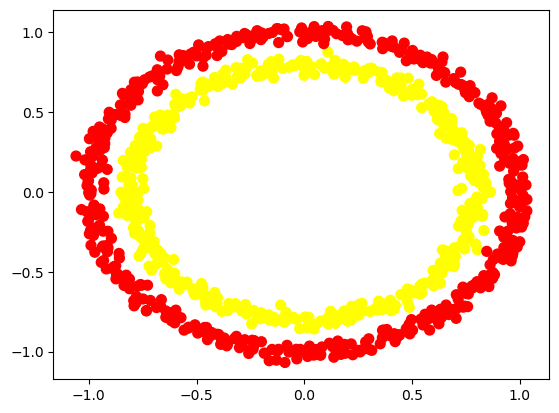

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [9]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X.shape,y.shape,len(X),len(y)

((1000, 2), (1000,), 1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [12]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model1.fit(X, y, epochs=5)

2024-12-23 19:26:30.294643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-23 19:26:30.294672: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-23 19:26:30.294686: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (iv-yddi5wlhj4qc6il2vxqe): /proc/driver/nvidia/version does not exist
2024-12-23 19:26:30.294869: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
32/32 [==============================] - 0s 590us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 540us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 526us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 448us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 428us/step - loss: 0.6942 - accuracy: 0.4820


In [13]:
model1.fit(X,y,epochs=100,verbose=0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 476us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

In [14]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
model2.fit(X, y, epochs=5,verbose=0)
model2.evaluate(X, y)

32/32 [==============================] - 0s 468us/step - loss: 0.7018 - accuracy: 0.4980


[0.7018194794654846, 0.49799999594688416]

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** The following message (below this one) can be ignored if you're running TensorFlow 2.8.0+, the error seems to have been fixed.

> **Note:** If you're using TensorFlow 2.7.0+ (but not 2.8.0+) the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)


In [15]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    # Before TensorFlow 2.7.0
    # tf.keras.layers.Dense(100), # add 100 dense neurons

    # With TensorFlow 2.7.0
    tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

    ## After TensorFlow 2.8.0 ##
    # tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model3.fit(X,y,epochs=5,verbose=0)
model3.evaluate(X,y)

32/32 [==============================] - 0s 514us/step - loss: 0.6935 - accuracy: 0.5000


[0.6935060024261475, 0.5]

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # 创建网格
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # 预测
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    print(f"x_in.shape:{x_in.shape}")
    y_pred = model.predict(x_in)
    print(f"y_pred.shape:{y_pred.shape}")
    if model.output_shape[-1]>1:
        y_pred = np.argmax(y_pred, axis=-1).reshape(xx.shape)
    else:
        # 这里是axis=1,取第二个维度
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [17]:
model3.output_shape

(None, None, 1)

x_in.shape:(10000, 2)
y_pred.shape:(10000, 2, 1)


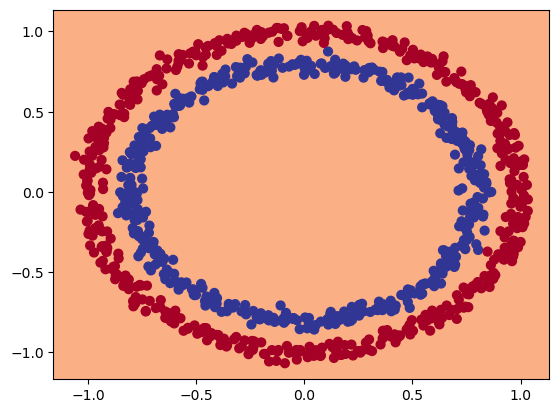

In [18]:
plot_decision_boundary(model3, X, y)

In [19]:
# 测试回归模型，线性相关
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
print(X_reg_train.shape, y_reg_train.shape)
model3.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,
            epochs=100)


(150,) (150,)
Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: -5544.6641 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: -7142.3501 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: -7148.8525 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: -7144.1909 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: -7149.5767 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: -7142.3818 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: -7148.7231 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: -7149.3975 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: -7146.9932 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [=======================

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 100)         200       
                                                                 
 dense_4 (Dense)             (None, None, 10)          1010      
                                                                 
 dense_5 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
model3.fit(tf.expand_dims(X_reg_train,-1),y_reg_train,epochs=100)

Epoch 1/100


5/5 [==============================] - 0s 965us/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 815us/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 876us/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 745us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 857us/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 830us/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 799us/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 863us/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 847us/step - loss: 43.6830 - mae: 43.6830
Epoch 10/100
5/5 [==============================] - 0s 778us/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [=============================

(50, 1)


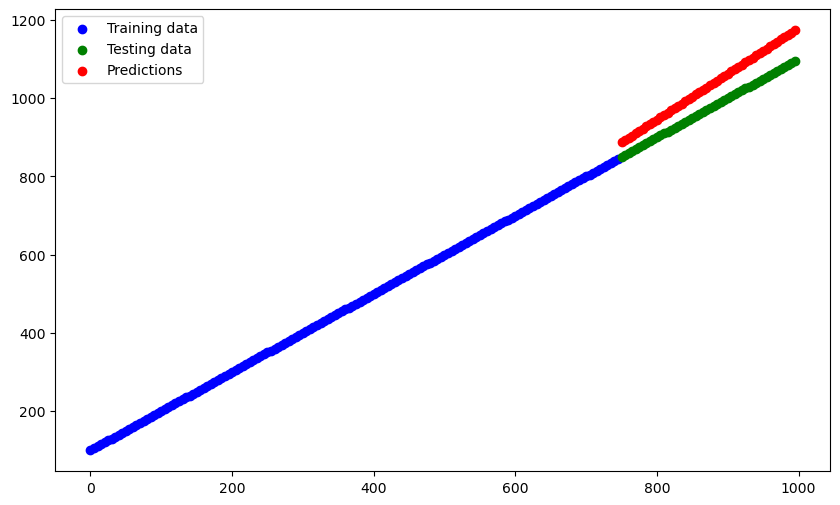

In [22]:
y_reg_preds = model3.predict(X_reg_test)
print(y_reg_preds.shape)

plt.figure(figsize=(10, 6))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()


## The missing piece: Non-linearity

Did you try out the activation options? If so, what did you find?

If you didn't, don't worry, let's see it in code.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

![simple neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-simple-net-linear-activation.png)
*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).*

The main change we'll add to models we've built before is the use of the `activation` keyword.

In [23]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
  tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

history = model4.fit(X, y, epochs=100)

Epoch 1/100


32/32 [==============================] - 0s 594us/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 545us/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 546us/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 466us/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 499us/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 435us/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 417us/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 479us/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 441us/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 448us/step - loss: 0.6962 - accuracy: 0.4920
E

In [24]:
history

In [25]:
X.shape,y.shape

((1000, 2), (1000,))

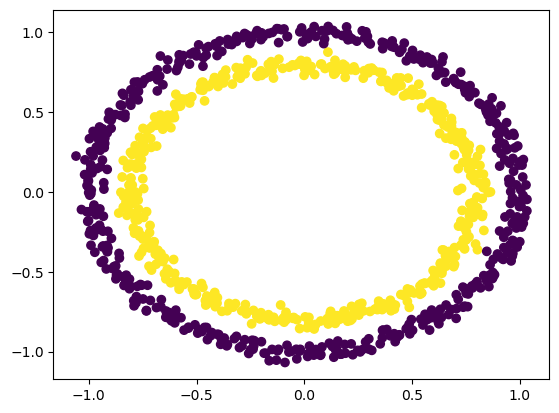

In [26]:
plt.scatter(X[:,0],X[:,1],c=y)

x_in.shape:(10000, 2)


y_pred.shape:(10000, 1)


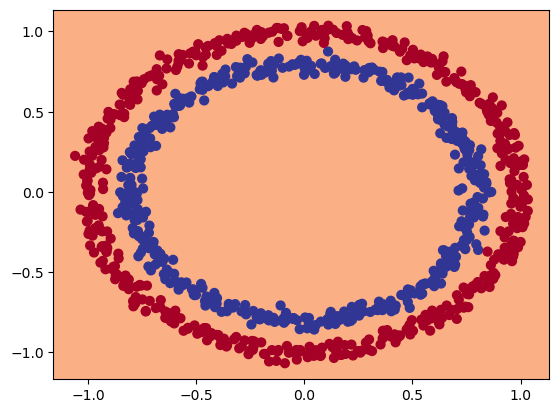

In [27]:
plot_decision_boundary(model4, X, y)

In [28]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1)
])

model5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model5.fit(X, y, epochs=500)

Epoch 1/500


32/32 [==============================] - 0s 589us/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/500
32/32 [==============================] - 0s 571us/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/500
32/32 [==============================] - 0s 594us/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/500
32/32 [==============================] - 0s 511us/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/500
32/32 [==============================] - 0s 539us/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/500
32/32 [==============================] - 0s 636us/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/500
32/32 [==============================] - 0s 541us/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/500
32/32 [==============================] - 0s 527us/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/500
32/32 [==============================] - 0s 482us/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/500
32/32 [==============================] - 0s 481us/step - loss: 1.0407 - accuracy: 0.4550
E

x_in.shape:(10000, 2)


y_pred.shape:(10000, 1)


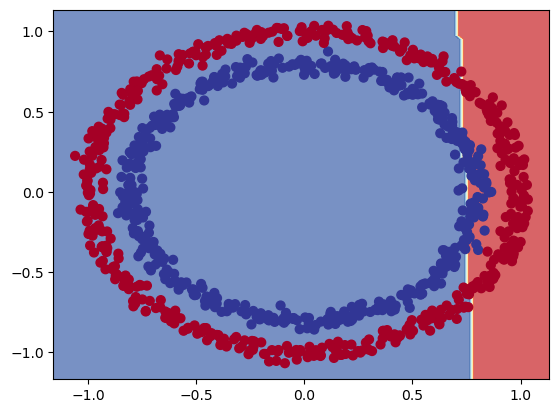

In [29]:
plot_decision_boundary(model5, X, y)

In [30]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

model6.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 673us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 667us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 650us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 598us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 615us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 638us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 639us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 679us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 642us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 651us/step - loss: 7.7125 - accura

x_in.shape:(10000, 2)
y_pred.shape:(10000, 1)


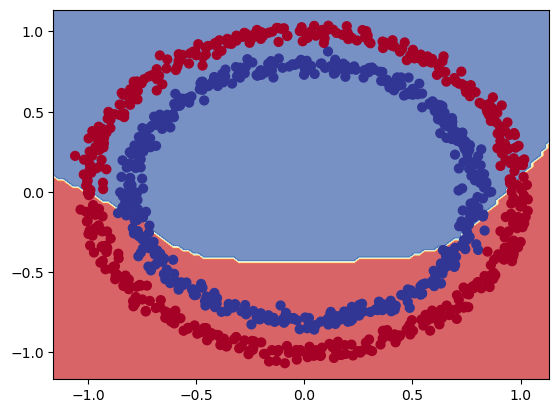

In [31]:
plot_decision_boundary(model6, X, y)

分类需要给最后一层，二分类添加sigmod,多分类添加softmax

In [32]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model7.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = model7.fit(X, y, epochs=100)

Epoch 1/100


32/32 [==============================] - 0s 658us/step - loss: 0.6988 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 634us/step - loss: 0.6861 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 653us/step - loss: 0.6807 - accuracy: 0.5290
Epoch 4/100
32/32 [==============================] - 0s 668us/step - loss: 0.6777 - accuracy: 0.5360
Epoch 5/100
32/32 [==============================] - 0s 603us/step - loss: 0.6752 - accuracy: 0.5340
Epoch 6/100
32/32 [==============================] - 0s 678us/step - loss: 0.6728 - accuracy: 0.5400
Epoch 7/100
32/32 [==============================] - 0s 764us/step - loss: 0.6699 - accuracy: 0.5560
Epoch 8/100
32/32 [==============================] - 0s 756us/step - loss: 0.6676 - accuracy: 0.5630
Epoch 9/100
32/32 [==============================] - 0s 663us/step - loss: 0.6647 - accuracy: 0.5780
Epoch 10/100
32/32 [==============================] - 0s 721us/step - loss: 0.6617 - accuracy: 0.5630
E

In [33]:
model7.evaluate(X, y)

32/32 [==============================] - 0s 502us/step - loss: 0.0246 - accuracy: 1.0000


[0.024602321907877922, 1.0]

x_in.shape:(10000, 2)


y_pred.shape:(10000, 1)


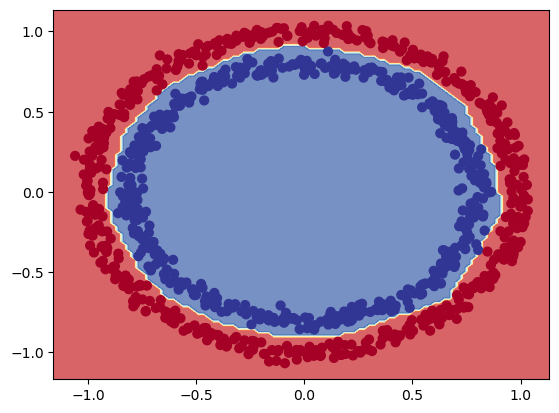

In [34]:
plot_decision_boundary(model7, X, y)

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [35]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

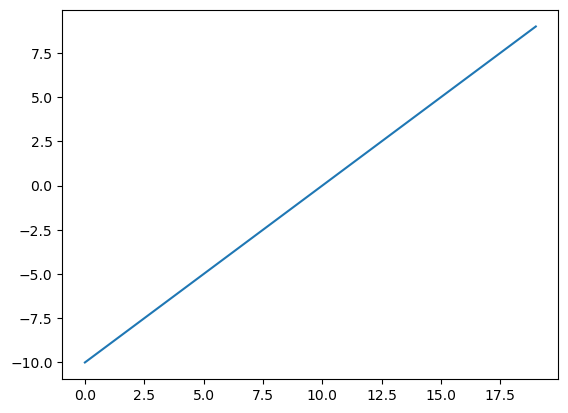

In [36]:
plt.plot(A)

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
sigmoid(A)

array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941402e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797029e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)

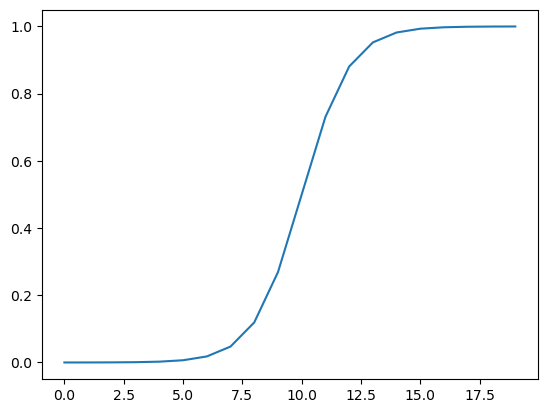

In [38]:
plt.plot(sigmoid(A))

In [39]:
def relu(x):
    return tf.maximum(0.0, x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

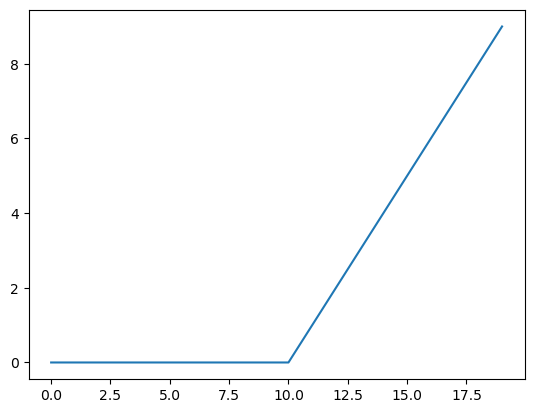

In [40]:
plt.plot(relu(A))

In [41]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [42]:
A == tf.keras.activations.linear(A)
#  tf.keras.activations.linear,没有做出任何改变

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

In [43]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [44]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model8.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
history = model8.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 0s 675us/step - loss: 0.6811 - accuracy: 0.6075
Epoch 2/10
25/25 [==============================] - 0s 586us/step - loss: 0.6594 - accuracy: 0.6888
Epoch 3/10
25/25 [==============================] - 0s 598us/step - loss: 0.6265 - accuracy: 0.7038
Epoch 4/10
25/25 [==============================] - 0s 614us/step - loss: 0.5575 - accuracy: 0.9038
Epoch 5/10
25/25 [==============================] - 0s 597us/step - loss: 0.4513 - accuracy: 0.9262
Epoch 6/10
25/25 [==============================] - 0s 596us/step - loss: 0.3108 - accuracy: 0.9800
Epoch 7/10
25/25 [==============================] - 0s 567us/step - loss: 0.2250 - accuracy: 0.9837
Epoch 8/10
25/25 [==============================] - 0s 596us/step - loss: 0.1538 - accuracy: 0.9887
Epoch 9/10
25/25 [==============================] - 0s 549us/step - loss: 0.1091 - accuracy: 0.9925
Epoch 10/10
25/25 [==============================] - 0s 601us/step - loss: 0.0795 - accuracy: 1.0000

In [45]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 582us/step - loss: 0.0599 - accuracy: 1.0000


[0.05992681533098221, 1.0]

x_in.shape:(10000, 2)


y_pred.shape:(10000, 1)
x_in.shape:(10000, 2)
y_pred.shape:(10000, 1)


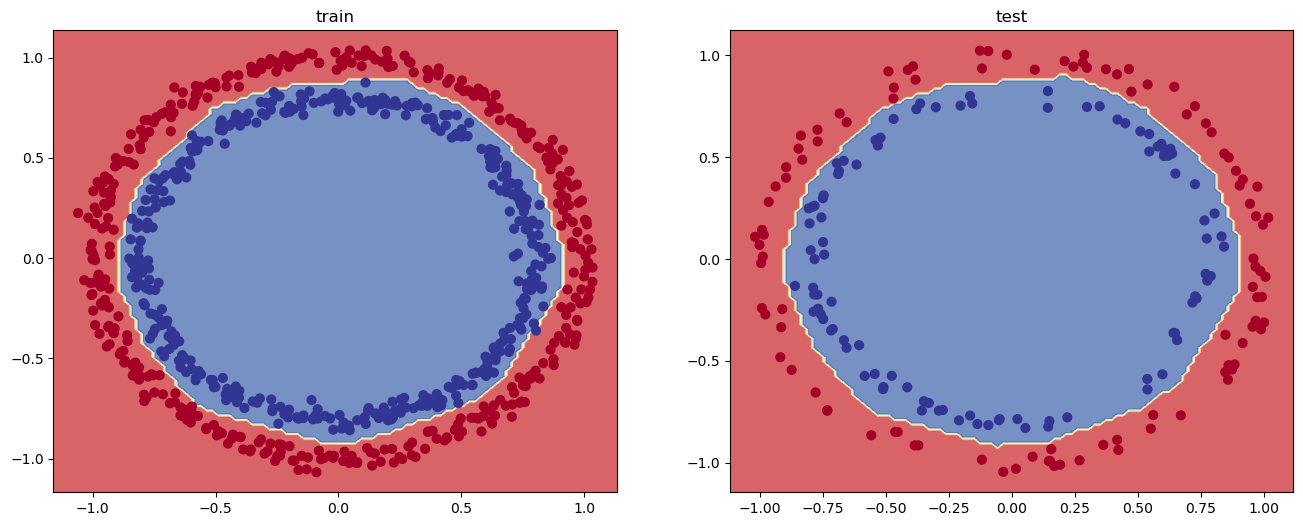

In [46]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model8, X_test, y_test)

### Plot the loss curves
You might've seen we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

In [47]:
history.history

{'loss': [0.6811122298240662,
  0.6594204902648926,
  0.6264875531196594,
  0.557544469833374,
  0.4512549340724945,
  0.3108353018760681,
  0.22497060894966125,
  0.15379780530929565,
  0.10911130160093307,
  0.07953354716300964],
 'accuracy': [0.6075000166893005,
  0.6887500286102295,
  0.7037500143051147,
  0.9037500023841858,
  0.9262499809265137,
  0.9800000190734863,
  0.9837499856948853,
  0.9887499809265137,
  0.9925000071525574,
  1.0]}

In [48]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.681112,0.60750
1,0.659420,0.68875
2,0.626488,0.70375
3,0.557544,0.90375
4,0.451255,0.92625


<Axes: >

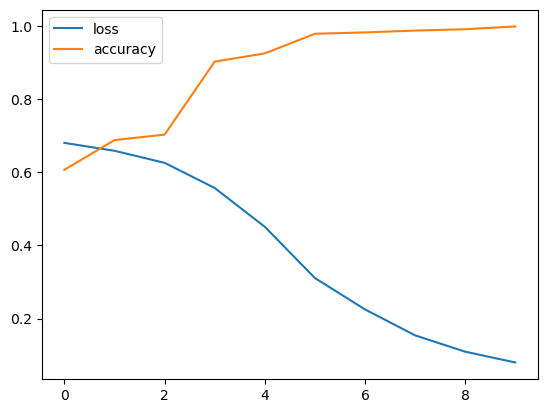

In [49]:
pd.DataFrame(history.history).plot()

### Finding the best learning rate
To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [50]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model9.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
history = model9.fit(X_train, y_train, epochs=100,callbacks=[lr_schedule])

Epoch 1/100
25/25 [==============================] - 0s 773us/step - loss: 0.7084 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 684us/step - loss: 0.7060 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 687us/step - loss: 0.7036 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 710us/step - loss: 0.7012 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 654us/step - loss: 0.6988 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 652us/step - loss: 0.6963 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 651us/step - loss: 0.6940 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 693us/step - loss: 0.6917 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: >

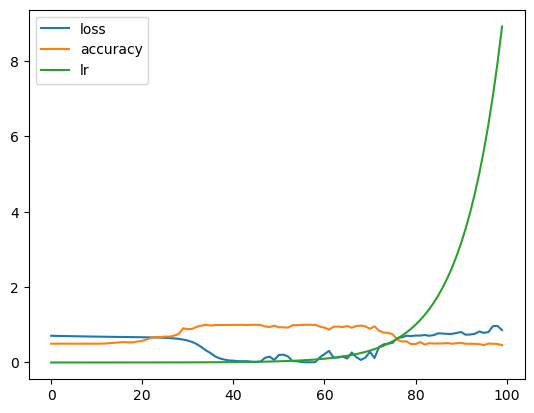

In [51]:
pd.DataFrame(history.history).plot()

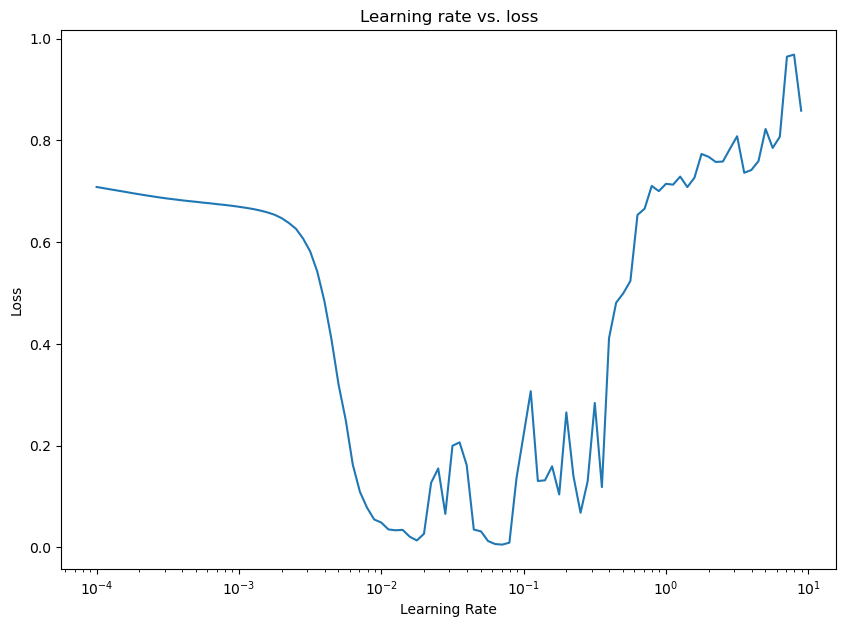

In [52]:
lrs  = 1e-4 *(10**(np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [53]:
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model10.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 
history = model10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 618us/step - loss: 0.6772 - accuracy: 0.6200
Epoch 2/20
25/25 [==============================] - 0s 610us/step - loss: 0.6327 - accuracy: 0.6787
Epoch 3/20
25/25 [==============================] - 0s 573us/step - loss: 0.5229 - accuracy: 0.8888
Epoch 4/20
25/25 [==============================] - 0s 598us/step - loss: 0.3383 - accuracy: 0.9737
Epoch 5/20
25/25 [==============================] - 0s 597us/step - loss: 0.2063 - accuracy: 0.9875
Epoch 6/20
25/25 [==============================] - 0s 568us/step - loss: 0.1503 - accuracy: 0.9887
Epoch 7/20
25/25 [==============================] - 0s 599us/step - loss: 0.1072 - accuracy: 0.9925
Epoch 8/20
25/25 [==============================] - 0s 590us/step - loss: 0.0774 - accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 571us/step - loss: 0.0610 - accuracy: 0.9975
Epoch 10/20
25/25 [==============================] - 0s 558us/step - loss: 0.0557 - accuracy: 0.9975

In [54]:
model10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 581us/step - loss: 0.0121 - accuracy: 1.0000


[0.01212803740054369, 1.0]

x_in.shape:(10000, 2)


y_pred.shape:(10000, 1)
x_in.shape:(10000, 2)
y_pred.shape:(10000, 1)


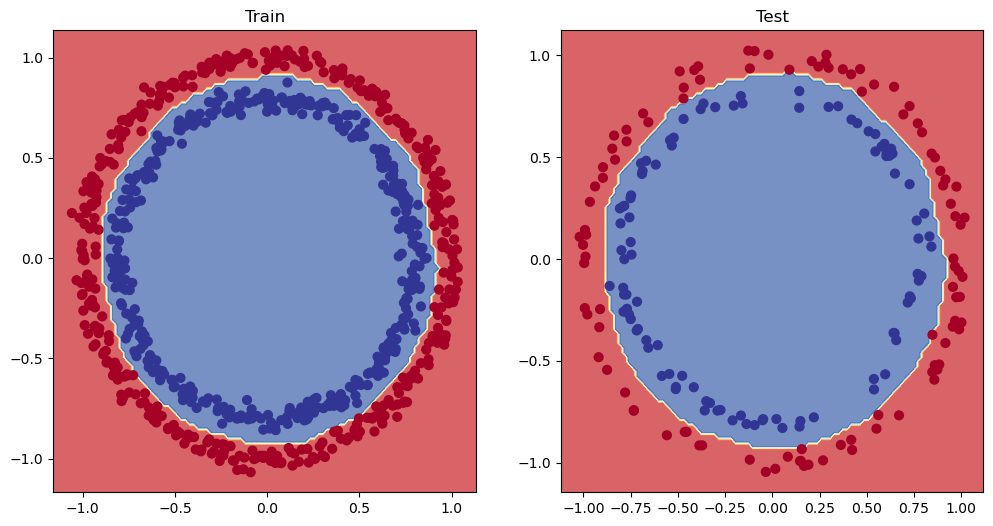

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [56]:
loss,acc = model10.evaluate(X_test, y_test)
loss,acc

7/7 [==============================] - 0s 655us/step - loss: 0.0121 - accuracy: 1.0000


(0.01212803740054369, 1.0)

How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [57]:
from sklearn.metrics import confusion_matrix

y_preds = model10.predict(X_test)

print(y_test.shape,y_preds.shape)

(200,) (200, 1)


In [58]:
# confusion_matrix(y_test, y_preds)
print(y_preds.squeeze().shape)
print(y_test[:10])
print(y_preds[:10])
print(tf.round(y_preds.squeeze()[:10]))
# confusion_matrix要求里面的值是整数，需要round
print(confusion_matrix(y_test, tf.round(y_preds.squeeze())))
print(confusion_matrix(y_test, tf.round(y_preds)))

(200,)
[1 1 1 1 0 0 1 0 1 0]
[[9.9895102e-01]
 [9.9902701e-01]
 [9.9884844e-01]
 [9.9908113e-01]
 [5.9247434e-02]
 [1.6662478e-04]
 [9.9316394e-01]
 [2.8446744e-05]
 [9.9905443e-01]
 [2.5577247e-03]]
tf.Tensor([1. 1. 1. 1. 0. 0. 1. 0. 1. 0.], shape=(10,), dtype=float32)
[[101   0]
 [  0  99]]
[[101   0]
 [  0  99]]


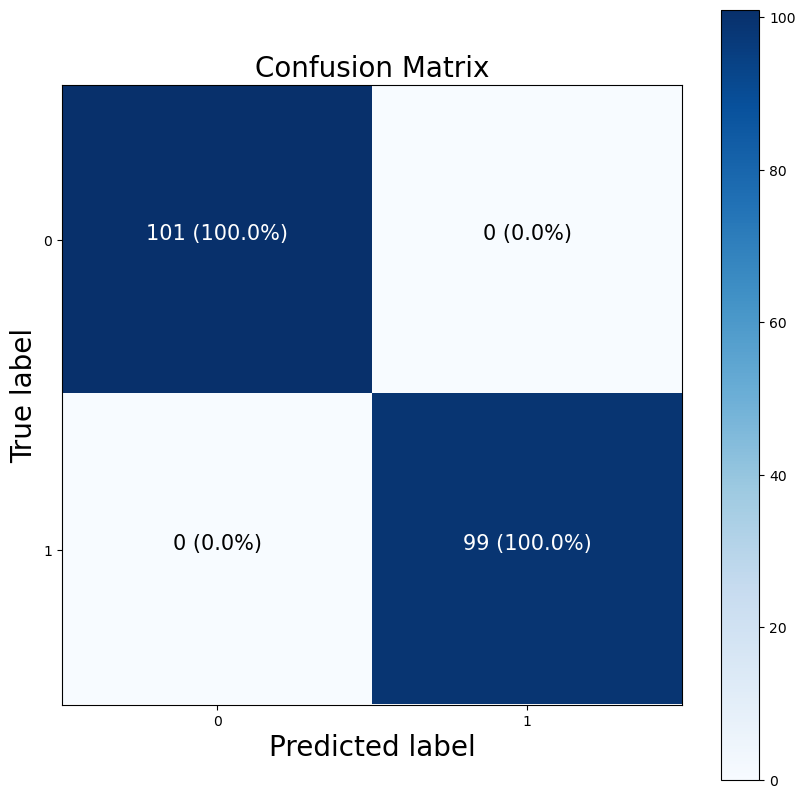

In [59]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [60]:
cm.shape[0],cm.shape[1]

(2, 2)

In [61]:
import itertools
for i, j in itertools.product(range(2), range(2)):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)
fashion 数据集

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [63]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [64]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [65]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

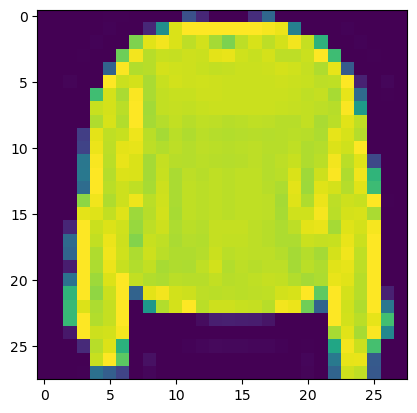

In [66]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])


In [67]:
train_labels[7]

2

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

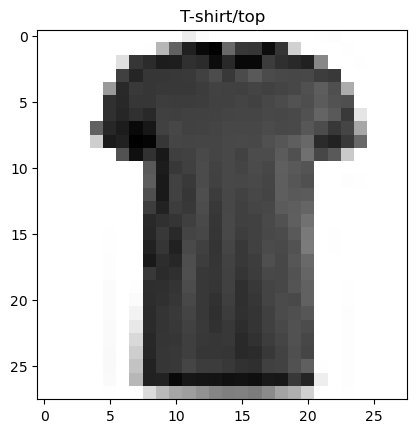

In [69]:
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]])

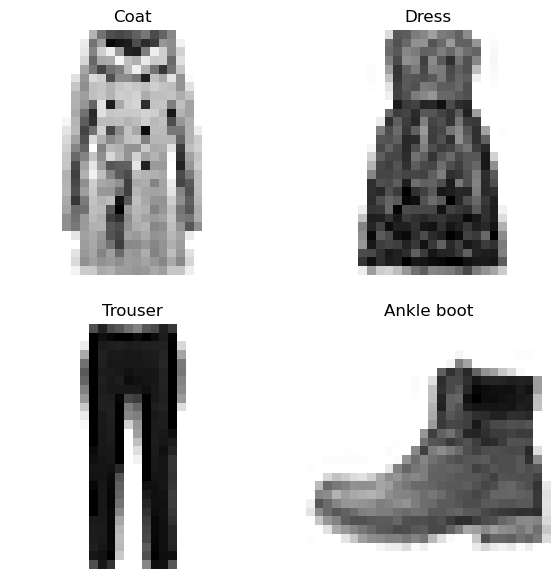

In [70]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [71]:
# 构建多分类模型
tf.random.set_seed(42)

model11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # 3表示输出节点个数，即分类个数
])

model11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history11_1 = model11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 867us/step - loss: 2.1535 - accuracy: 0.1641 - val_loss: 1.7981 - val_accuracy: 0.2207
Epoch 2/10
1875/1875 [==============================] - 1s 775us/step - loss: 1.6975 - accuracy: 0.2559 - val_loss: 1.6481 - val_accuracy: 0.2894
Epoch 3/10
1875/1875 [==============================] - 1s 769us/step - loss: 1.6331 - accuracy: 0.2819 - val_loss: 1.6061 - val_accuracy: 0.2784
Epoch 4/10
1875/1875 [==============================] - 1s 769us/step - loss: 1.6065 - accuracy: 0.2879 - val_loss: 1.6064 - val_accuracy: 0.2931
Epoch 5/10
1875/1875 [==============================] - 1s 755us/step - loss: 1.6022 - accuracy: 0.2986 - val_loss: 1.5847 - val_accuracy: 0.3254
Epoch 6/10
1875/1875 [==============================] - 1s 751us/step - loss: 1.5890 - accuracy: 0.3109 - val_loss: 1.5727 - val_accuracy: 0.3346
Epoch 7/10
1875/1875 [==============================] - 1s 750us/step - loss: 1.5878 - accuracy: 0.3158 - val_loss: 1.5653 -

In [72]:
model11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [73]:
train_data.min(), train_data.max()

(0, 255)

In [74]:
# Divide train and test images by the maximum value (normalize it)
# 0~1 缩放
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [75]:
# 构建多分类模型
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # 3表示输出节点个数，即分类个数
])

model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history12 = model12.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 766us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 757us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 717us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

<Axes: title={'center': 'history12-0~1缩放'}>

/root/miniconda3/envs/torchai/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32553 (\N{CJK UNIFIED IDEOGRAPH-7F29}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/root/miniconda3/envs/torchai/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


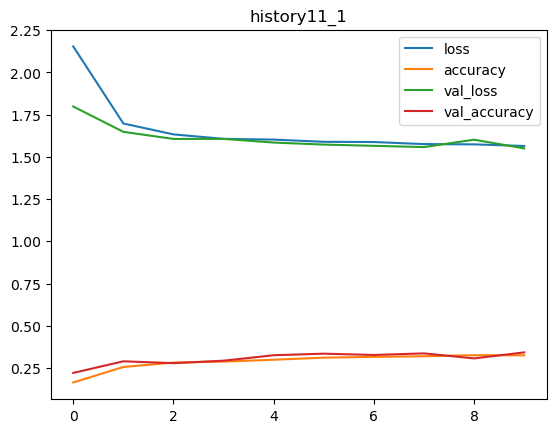

/root/miniconda3/envs/torchai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32553 (\N{CJK UNIFIED IDEOGRAPH-7F29}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/torchai/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


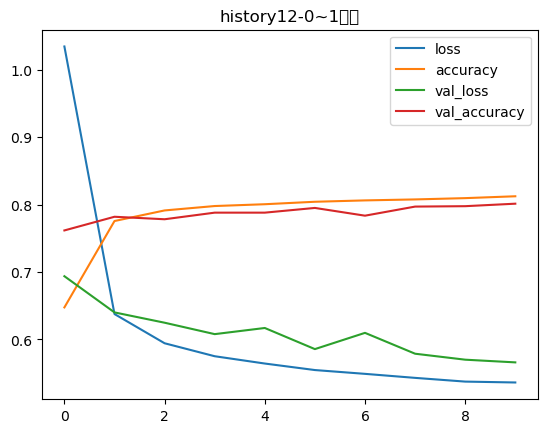

In [76]:
# 0~1缩放，能明显提升准确率
pd.DataFrame(history11_1.history).plot(title="history11_1")
pd.DataFrame(history12.history).plot(title="history12-0~1缩放")

In [77]:
# 构建多分类模型
tf.random.set_seed(42)

model13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # 3表示输出节点个数，即分类个数
])


model13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 找到合适的学习率
history13 = model13.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 808us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 743us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 726us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 749us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 751us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 739us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

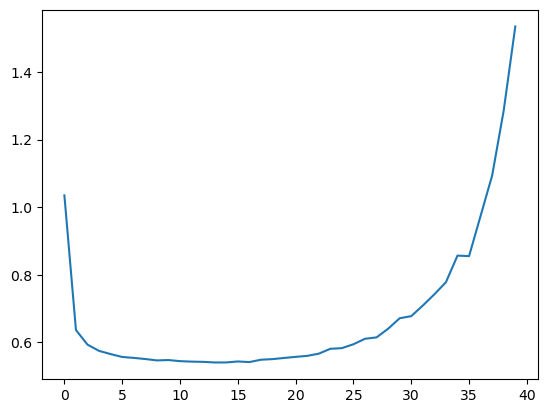

In [78]:
plt.plot(history13.history['loss'])

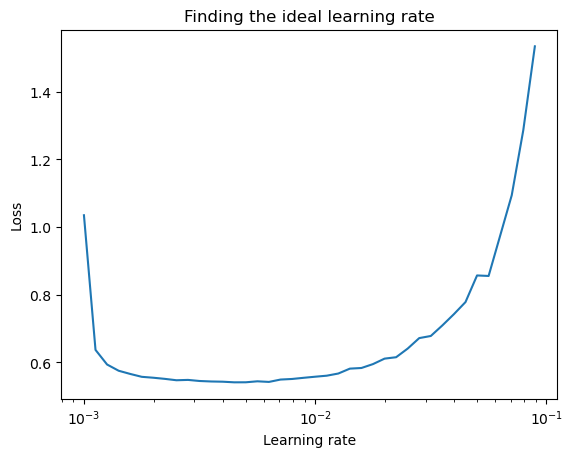

In [79]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history13.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [80]:
# 最好的学习率是0.001左右

# 构建多分类模型
tf.random.set_seed(42)

model14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # 3表示输出节点个数，即分类个数
])


model14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])


# 找到合适的学习率
history14 = model14.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels))

Epoch 1/40
1875/1875 [==============================] - 2s 785us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 726us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 1s 726us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 1s 723us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 1s 731us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 1s 731us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 1s 730us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

In [81]:
## confusion  matrix

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [82]:
y_probs = model14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
# 预测的值
y_probs[:5]

array([[1.7880211e-10, 8.5933483e-11, 1.4691735e-05, 5.1316169e-07,
        1.8115279e-05, 2.9706070e-01, 4.2002778e-08, 4.3864474e-02,
        4.0301392e-03, 6.5501142e-01],
       [1.6536693e-05, 3.7722162e-16, 9.0731686e-01, 7.2907096e-07,
        2.4724158e-02, 4.1507976e-17, 6.7499369e-02, 0.0000000e+00,
        4.4238765e-04, 1.7746521e-15],
       [4.3351520e-05, 9.9850523e-01, 1.0621152e-07, 1.4285076e-03,
        1.5484740e-05, 6.9150244e-22, 7.3781785e-06, 1.2294380e-16,
        5.2957851e-08, 6.0544048e-12],
       [4.3009019e-05, 9.9656624e-01, 7.1574004e-07, 3.2499917e-03,
        1.1907877e-04, 2.1641282e-19, 2.0428239e-05, 5.0368699e-14,
        6.1727491e-07, 1.1401907e-09],
       [1.4729892e-01, 2.3954485e-06, 1.3310784e-01, 1.0181711e-02,
        3.3240393e-02, 4.5579678e-18, 6.7567068e-01, 2.7517693e-29,
        4.9809471e-04, 1.6230779e-14]], dtype=float32)

In [83]:
y_probs[0].argmax(),class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [84]:
y_preds = y_probs.argmax(axis=1)
# 预测的类别    
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[833,  13,  11,  54,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  83,  29, 728,   0, 150,   0,   7,   0],
       [  0,   1,   0,   0,   0, 941,   0,  34,   3,  21],
       [217,   9, 117,  34,  98,   3, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  70,   0, 905,   0,  25],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

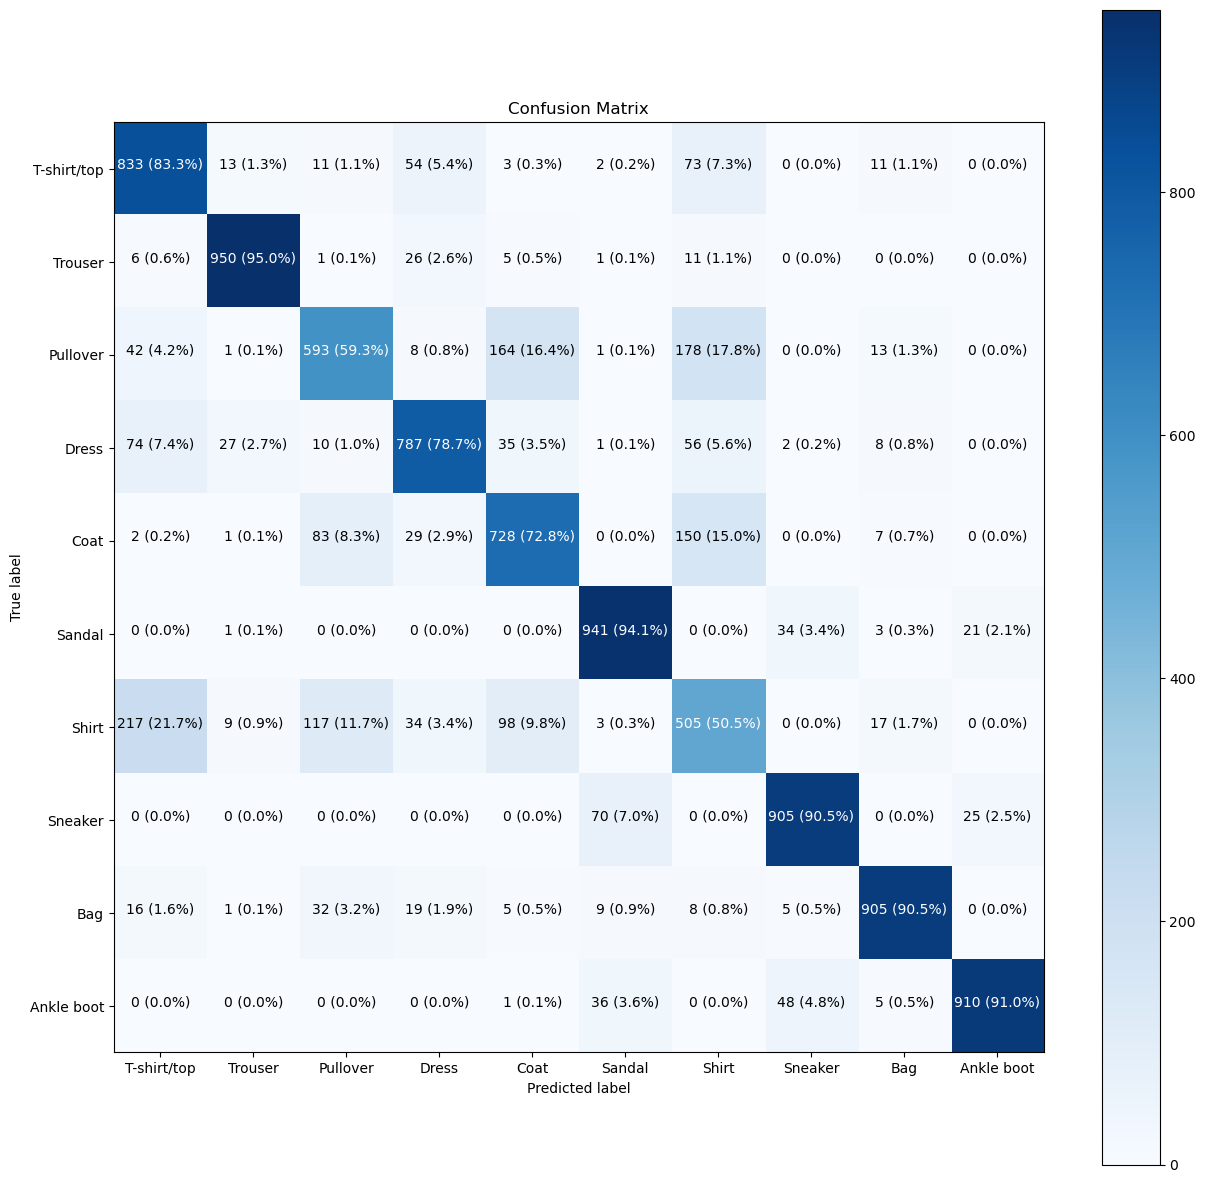

In [86]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [87]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

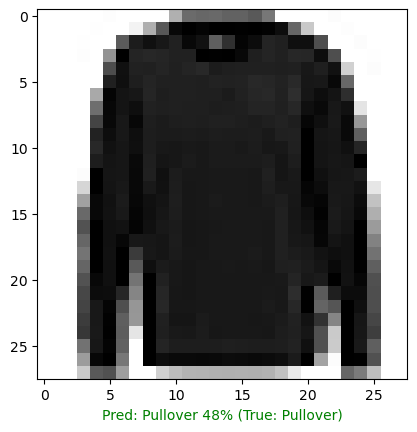

In [88]:
plot_random_image(model14,test_data,test_labels,class_names)

In [89]:
# 模型的结构
model14.layers

In [90]:
model14.layers[1]

In [91]:
weights, biases = model14.layers[1].get_weights()
weights, biases

(array([[ 1.5936171 , -0.7697681 , -1.5807062 , -1.9991511 ],
        [ 0.4560955 , -1.2976128 , -0.7302903 , -0.16224086],
        [ 1.3480375 , -0.19881931, -1.9888437 , -1.213752  ],
        ...,
        [-0.22335109,  0.5940305 , -0.27262577,  0.46042725],
        [-0.21883886,  1.1971757 ,  0.5428996 , -0.5791028 ],
        [ 0.3765342 , -0.19791628,  0.02285718,  0.24255306]],
       dtype=float32),
 array([ 0.32817858, -0.01041841, -0.15842937,  1.2009083 ], dtype=float32))

In [92]:
weights.shape, biases.shape

((784, 4), (4,))

In [93]:
model14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


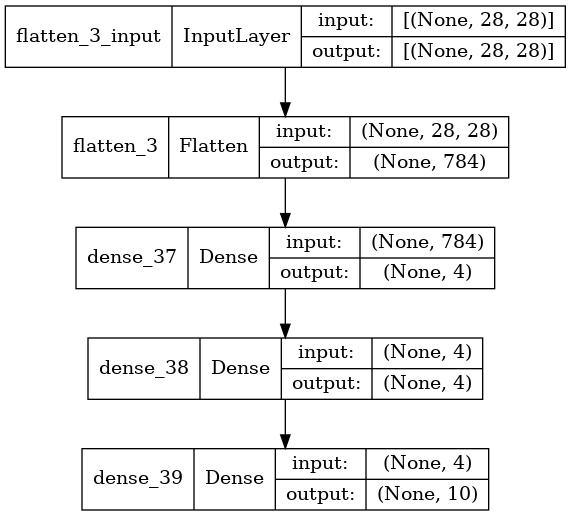

In [94]:
from tensorflow.keras.utils import  plot_model

plot_model(model14, show_shapes=True)

## Exerscise

2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.m

In [95]:
model21 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[2]),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    ])
model21.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model21.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1)                 3         
                                                                 
 dense_41 (Dense)            (None, 6)                 12        
                                                                 
 dense_42 (Dense)            (None, 6)                 42        
                                                                 
 dense_43 (Dense)            (None, 6)                 42        
                                                                 
 dense_44 (Dense)            (None, 6)                 42        
                                                                 
 dense_45 (Dense)            (None, 6)                 42        
                                                                 
 dense_46 (Dense)            (None, 1)               

In [102]:
# 3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.01, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

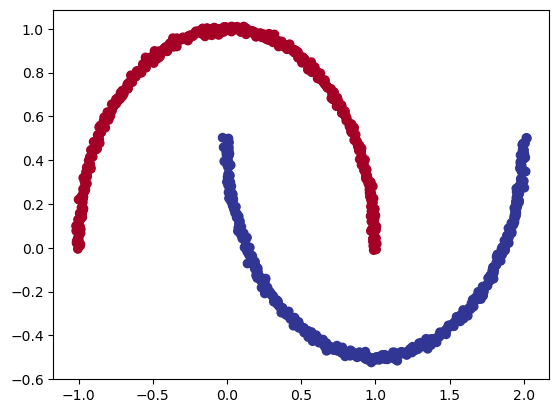

In [103]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [107]:
model31 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model31.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])
model31.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 728us/step - loss: 0.6659 - accuracy: 0.7430
Epoch 2/100
32/32 [==============================] - 0s 668us/step - loss: 0.6007 - accuracy: 0.8660
Epoch 3/100
32/32 [==============================] - 0s 681us/step - loss: 0.5190 - accuracy: 0.8740
Epoch 4/100
32/32 [==============================] - 0s 640us/step - loss: 0.4445 - accuracy: 0.8730
Epoch 5/100
32/32 [==============================] - 0s 671us/step - loss: 0.3789 - accuracy: 0.8820
Epoch 6/100
32/32 [==============================] - 0s 673us/step - loss: 0.3240 - accuracy: 0.8830
Epoch 7/100
32/32 [==============================] - 0s 700us/step - loss: 0.2815 - accuracy: 0.8850
Epoch 8/100
32/32 [==============================] - 0s 666us/step - loss: 0.2540 - accuracy: 0.8860
Epoch 9/100
32/32 [==============================] - 0s 645us/step - loss: 0.2383 - accuracy: 0.8850
Epoch 10/100
32/32 [==============================] - 0s 654us/step - loss: 0.2268 - accura

x_in.shape:(10000, 2)
y_pred.shape:(10000, 1)


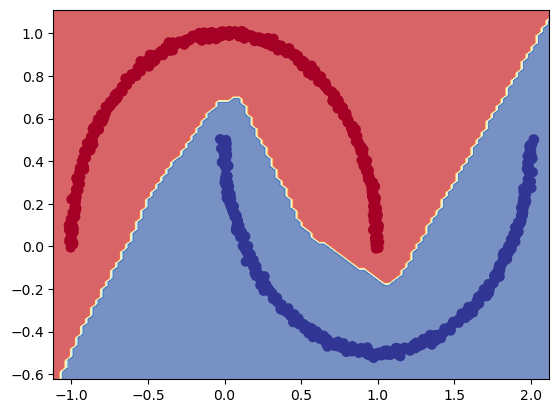

In [110]:
plot_decision_boundary(model31, X, y)

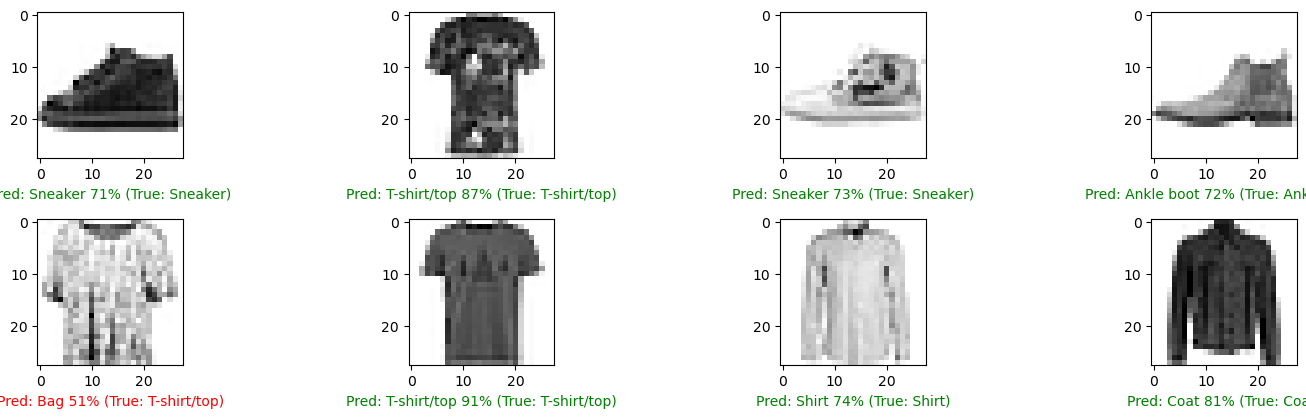

In [129]:
# 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

def plot_random_image2(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  plt.figure(figsize=(15,8))
  for j in range(8):
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.subplot(4,4,j+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                color=color) # set the color to green or red
  plt.tight_layout()
  plt.show()
    
plot_random_image2(model14,test_data,test_labels,class_names)

In [131]:
# 5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
def softmax2(x):
    x = tf.cast(x, tf.float32)
    exp_x = tf.math.exp(x-tf.reduce_max(x))
    return exp_x / tf.reduce_sum(exp_x)

tensor1 = tf.constant([[-4.0, 6.0, 2.0]])

softmax2(tensor1)
    

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[4.4581368e-05, 9.8196995e-01, 1.7985407e-02]], dtype=float32)>

In [133]:
# 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
fansion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

num_classes = 10     # 10 labels/classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [134]:
model61 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model61.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history61 = model61.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 881us/step - loss: 2.3196 - accuracy: 0.5610
Epoch 2/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.9446 - accuracy: 0.6333
Epoch 3/10
1875/1875 [==============================] - 2s 868us/step - loss: 0.7011 - accuracy: 0.7272
Epoch 4/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.6386 - accuracy: 0.7457
Epoch 5/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.5821 - accuracy: 0.7661
Epoch 6/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.5365 - accuracy: 0.7926
Epoch 7/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.4963 - accuracy: 0.8103
Epoch 8/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.4424 - accuracy: 0.8477
Epoch 9/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.4238 - accuracy: 0.8540
Epoch 10/10
1875/1875 [==============================] - 2s 872u

In [135]:
model61.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 611us/step - loss: 0.4557 - accuracy: 0.8425


[0.4556632936000824, 0.8424999713897705]

In [ ]:
pd.DataFrame(history61.history)

,loss,accuracy
0,2.319560,0.560983
1,0.944634,0.633283
2,0.701060,0.727167
3,0.638610,0.745733
4,0.582059,0.766150
5,0.536493,0.792583
6,0.496261,0.810283
7,0.442371,0.847667
8,0.423833,0.854000
9,0.407266,0.857583


<Axes: >

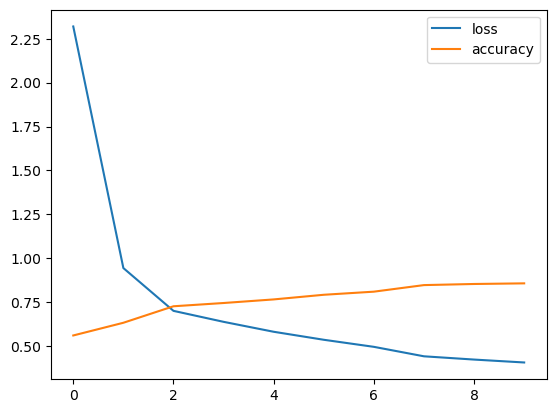

In [137]:
pd.DataFrame(history61.history).plot()

In [143]:
y_prod = model61.predict(test_images)
y_prod

array([[1.2788596e-19, 0.0000000e+00, 0.0000000e+00, ..., 2.6208211e-02,
        5.9861754e-11, 9.3768293e-01],
       [1.2492390e-03, 2.5394028e-03, 9.7657043e-01, ..., 6.7686287e-18,
        1.0082149e-06, 2.5030484e-33],
       [7.0327375e-09, 1.0000000e+00, 6.6129068e-14, ..., 0.0000000e+00,
        7.1447950e-09, 0.0000000e+00],
       ...,
       [1.3188242e-04, 2.0388581e-05, 7.5476860e-09, ..., 7.6014913e-08,
        9.9984133e-01, 3.9020613e-08],
       [3.5194242e-07, 9.9997342e-01, 2.4702505e-08, ..., 2.1582191e-30,
        2.2672295e-06, 0.0000000e+00],
       [9.9361341e-07, 8.0446665e-19, 1.3372046e-23, ..., 9.4982125e-03,
        3.9408154e-05, 1.9039746e-02]], dtype=float32)

In [145]:
y_pred = tf.argmax(y_prod, axis=-1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

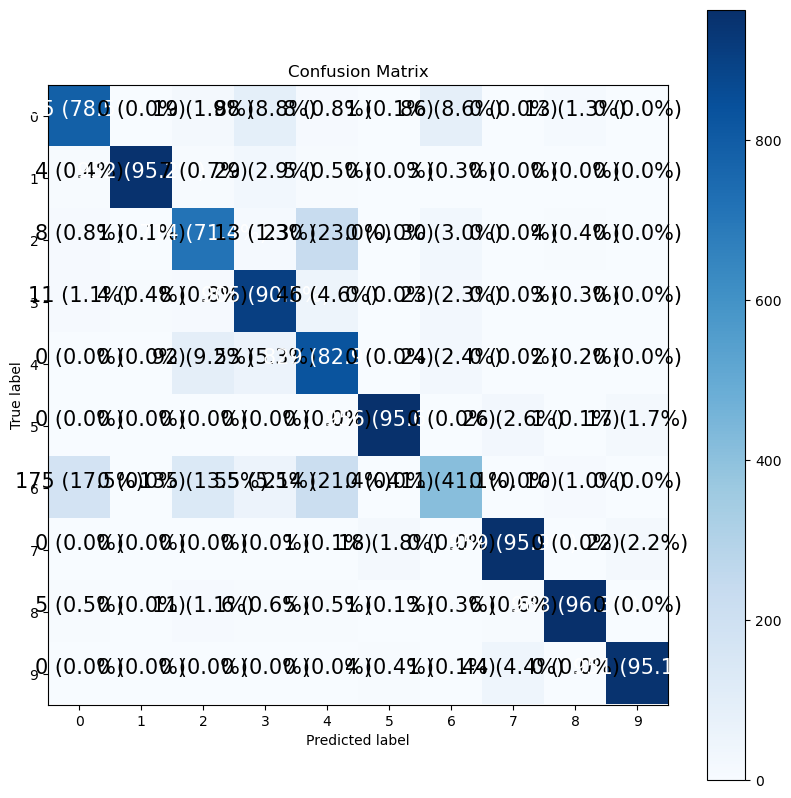

In [147]:
make_confusion_matrix(test_labels, y_pred,classes=classes)